In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
data = pd.read_csv('train.csv')

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data analysis

# Missing Data

In [49]:
data.isnull() #it shows true if the value is null and false if it's not

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# We can use seaborn to create a heatmap to see where we are missing data

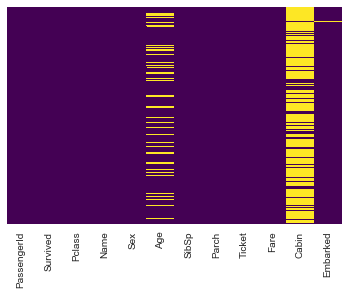

In [50]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #the heatmap ensures that whatever condition you put in is visualised 
#yticklabels=false means you don't want to display the ytick,
#cmap='viridis' ensures that the null values colors yellow in every column it is present,you can change it

Roughly 20% of age data is missing.The proportion of age missing is likely small enough for reasonable replacement with some form of imputation.
Look at the cabin column,it looks like we are missing too much of that data to do something useful with, at basic level we will probably drop this later or change it to another feature like 'cabin known 1 or 0'

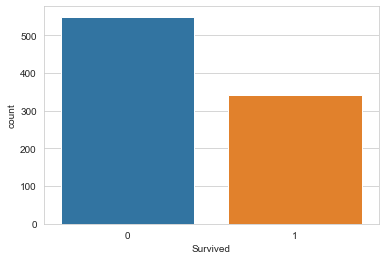

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

About 570 persons did not survive while about 330 persons survived

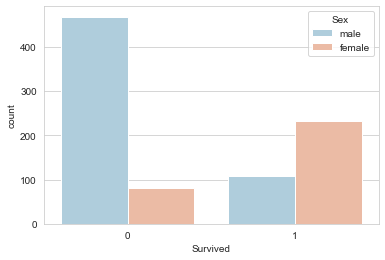

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

This shows that many males did not survive

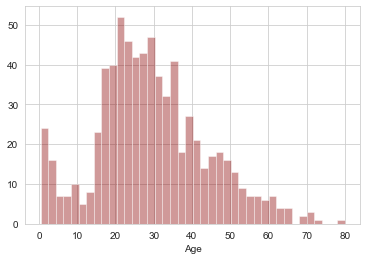

In [53]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

This is a normal distribution becos it has a bell curve

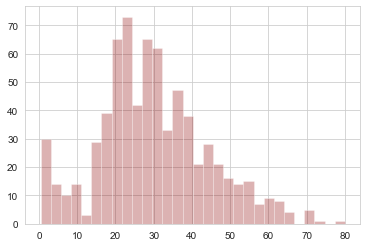

In [54]:
data['Age'].hist(bins=30,color='darkred',alpha=0.3)#this is matplotlib histogram

You can use either matplotlib (histogram) or seaborn (countplot) to view the distribution also note the change in bin to 30

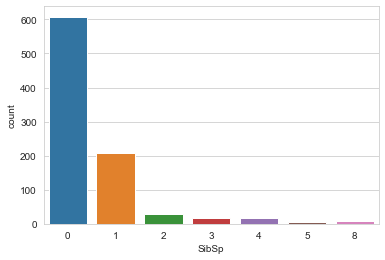

In [55]:
sns.countplot(x='SibSp',data=data)

This means many persengers did not travelled with their siblings but few travel with spouse

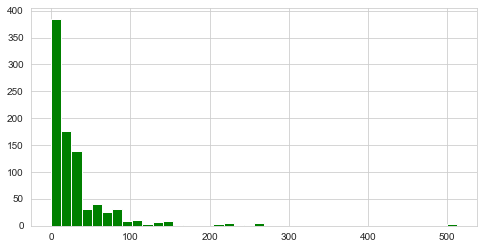

In [56]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

we want to fill in missing age data instead of just dropping the missing age data row.One way to do this is by filling in the mean age of all passengers, but we can be smartter about this and check the average age in each passenger class

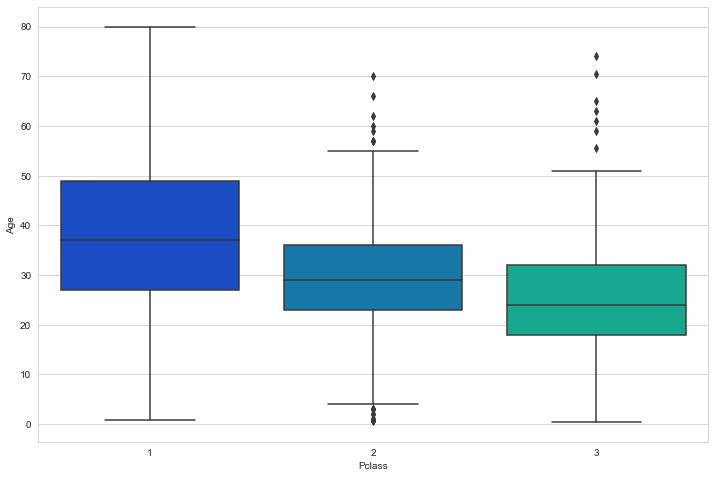

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [58]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [59]:
data['Age']=data[['Age','Pclass']].apply(impute,axis=1)

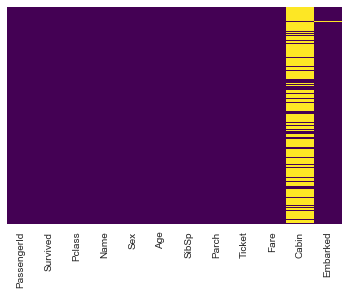

In [60]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The heatmap shows that the null values in the age columns as been replaced by the imputed means  

In [61]:
data.drop('Cabin',axis=1,inplace=True)

In [62]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


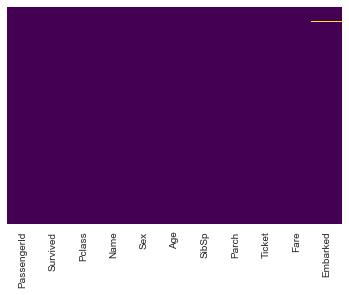

In [63]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

this heatmap shows that the cabin column as been dropped